In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [3]:
dataset = pd.read_csv('ac8in.csv')
x= dataset.iloc[:, [0,1,2]].values
x

array([['Alabama', nan, nan],
       ['Alaska', nan, nan],
       ['Arizona', nan, nan],
       ['Arkansas', nan, nan],
       ['California', 18.77, 32.96],
       ['Colorado', nan, nan],
       ['Connecticut', 53.18, 53.86],
       ['Delaware', 2.11, 23.71],
       ['Florida', nan, nan],
       ['Georgia', nan, nan],
       ['Hawaii', nan, nan],
       ['Idaho', nan, nan],
       ['Illinois', 40.25, 50.68],
       ['Indiana', 40.03, 51.09],
       ['Iowa', 49.13, 54.87],
       ['Kansas', nan, nan],
       ['Kentucky', 0.26, 0.93],
       ['Louisiana', nan, nan],
       ['Maine', 61.37, 64.15],
       ['Maryland', 0.32, 3.11],
       ['Massachusetts', 64.72, 62.75],
       ['Michigan', 56.98, 57.18],
       ['Minnesota', nan, 63.42],
       ['Mississippi', nan, nan],
       ['Missouri', nan, 10.29],
       ['Montana', nan, nan],
       ['Nebraska', nan, nan],
       ['Nevada', nan, nan],
       ['New Hampshire', 53.59, 56.89],
       ['New Jersey', 28.52, 48.13]], dtype=object)

In [4]:
dataset.isnull().any()

country     False
literacy     True
GDP          True
dtype: bool

In [5]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder_x = LabelEncoder()
x[:,0]=labelencoder_x.fit_transform(x[:,0])
x

array([[0, nan, nan],
       [1, nan, nan],
       [2, nan, nan],
       [3, nan, nan],
       [4, 18.77, 32.96],
       [5, nan, nan],
       [6, 53.18, 53.86],
       [7, 2.11, 23.71],
       [8, nan, nan],
       [9, nan, nan],
       [10, nan, nan],
       [11, nan, nan],
       [12, 40.25, 50.68],
       [13, 40.03, 51.09],
       [14, 49.13, 54.87],
       [15, nan, nan],
       [16, 0.26, 0.93],
       [17, nan, nan],
       [18, 61.37, 64.15],
       [19, 0.32, 3.11],
       [20, 64.72, 62.75],
       [21, 56.98, 57.18],
       [22, nan, 63.42],
       [23, nan, nan],
       [24, nan, 10.29],
       [25, nan, nan],
       [26, nan, nan],
       [27, nan, nan],
       [28, 53.59, 56.89],
       [29, 28.52, 48.13]], dtype=object)

In [6]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values ='NaN',strategy='mean',axis=0)
imputer=imputer.fit(x[:,[0,1,2]])
x[:,[0,1,2]]=imputer.transform(x[:,[0,1,2]])
x

C:\Users\NIKHIL\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[0.0, 36.09461538461539, 42.268],
       [1.0, 36.09461538461539, 42.268],
       [2.0, 36.09461538461539, 42.268],
       [3.0, 36.09461538461539, 42.268],
       [4.0, 18.77, 32.96],
       [5.0, 36.09461538461539, 42.268],
       [6.0, 53.18, 53.86],
       [7.0, 2.11, 23.71],
       [8.0, 36.09461538461539, 42.268],
       [9.0, 36.09461538461539, 42.268],
       [10.0, 36.09461538461539, 42.268],
       [11.0, 36.09461538461539, 42.268],
       [12.0, 40.25, 50.68],
       [13.0, 40.03, 51.09],
       [14.0, 49.13, 54.87],
       [15.0, 36.09461538461539, 42.268],
       [16.0, 0.26, 0.93],
       [17.0, 36.09461538461539, 42.268],
       [18.0, 61.37, 64.15],
       [19.0, 0.32, 3.11],
       [20.0, 64.72, 62.75],
       [21.0, 56.98, 57.18],
       [22.0, 36.09461538461539, 63.42],
       [23.0, 36.09461538461539, 42.268],
       [24.0, 36.09461538461539, 10.29],
       [25.0, 36.09461538461539, 42.268],
       [26.0, 36.09461538461539, 42.268],
       [27.0, 36.094615384

In [7]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
model.fit(x)
labels = model.labels_

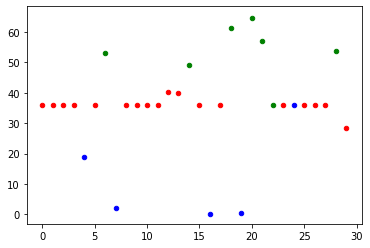

In [8]:
plt.scatter(x[labels==0, 0], x[labels==0, 1], s=20, marker='o', color='red')
plt.scatter(x[labels==1, 0], x[labels==1, 1], s=20, marker='o', color='blue')
plt.scatter(x[labels==2, 0], x[labels==2, 1], s=20, marker='o', color='green')